# Weight decay

In [1]:
import tensorflow as tf

from d2l.tensorflow import data, models, initializers, losses, metrics, plot, optimizers, config
import matplotlib.pyplot as plt

config.setup()

Tensorflow running on CPU


## Squared L2 norm penalty

In [2]:
def l2_penalty(lambd, W):
    return lambd * (tf.reduce_sum(W*W) / 2)

## Training and Testing

In [3]:
n_train, n_test, num_inputs = 20, 100, 200
true_W, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05

features = tf.random.normal(shape=(n_train + n_test, num_inputs))
labels = tf.matmul(features, true_W) + true_b
labels = labels + tf.random.normal(stddev=0.01, shape=labels.shape)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [4]:
batch_size, num_epochs, lr = 1, 100, 0.003
train_iters = len(train_features) // batch_size

net, loss_function, optimizer = models.linreg, losses.squared_loss, optimizers.sgd

In [5]:
def fit_and_plot(lambd):
    W, b = initializers.initialize_parameters(num_inputs, 1)

    train_iter = data.batch_iter(train_features, train_labels, batch_size=batch_size)
    train_ls, test_ls = [], []

    for _ in range(num_epochs):
        for i, (X, y) in enumerate(train_iter, 1):
            with tf.GradientTape() as t:
                loss = loss_function(net(X, W, b), y) + l2_penalty(lambd, W)
            dW, db = t.gradient(loss, [W, b])
            optimizer([W, b], [dW, db], lr, batch_size)
            if i == train_iters:
                break
        
        evaluate = lambda X, y: tf.reduce_mean(loss_function(net(X, W, b), y))
        train_ls.append(evaluate(train_features, train_labels))
        test_ls.append(evaluate(test_features, test_labels))
    
    
    print('l2 norm of w: {}'.format(tf.norm(W)))
    plot.semilogy(
        num_epochs, [train_ls, test_ls], ['train', 'test'], 
        'epochs', 'loss', [8, 4]
    )

l2 norm of w: 1.2757313251495361


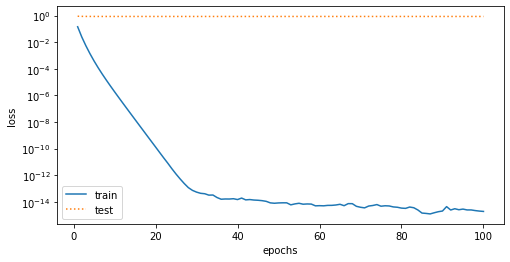

In [6]:
fit_and_plot(0)

l2 norm of w: 0.033002857118844986


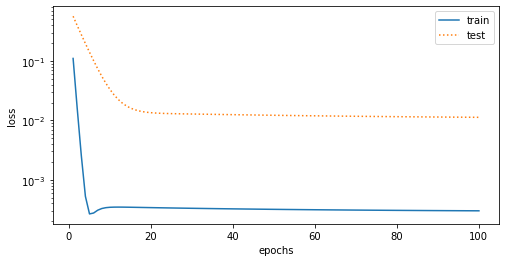

In [7]:
fit_and_plot(3)